In [94]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the compiled CSV file
input_file = r'C:\Users\aaron.eades\OneDrive - Liquid Environmental Solutions\Documents\Programing\Python\Automated Density\exports\compiled_file_with_source_2.csv'
df = pd.read_csv(input_file)

# List of columns representing the weeks (1 to 26)
week_columns = [str(i) for i in range(1, 27)]  # Adjust the range if fewer or more weeks exist

# Group by 'Site' and sum the Model Volume (week columns)
grouped_model = df.groupby('Site')[week_columns].sum()

# Define global parameters for Source projection
predict = 26  # Number of weeks to predict
weekCodes = [str(i) for i in range(1, predict + 1)]

# Function to create the source projection based on Source_NSD, frequency, and gallons
def create_customer_projection(start_week, frequency, gallons):
    projection = pd.Series(0, index=weekCodes)
    for week in range(start_week, predict + 1, frequency):
        if week <= predict:
            projection[str(week)] = gallons
    return projection

# List to store source projections for each customer
source_projections = []

# Generate projections for each customer using 'Source_NSD' as start_week
for idx, row in df.iterrows():
    try:
        start_week = int(row['Source_NSD'])  # Source start week is in 'Source_NSD'
        frequency = int(row['FREQ'])  # Frequency of service
        gallons = float(row['GALLONS'])  # Gallons for each customer

        # Create the projection for the source
        source_projection = create_customer_projection(start_week, frequency, gallons)

        # Append to source projections with the Site as an identifier
        source_projections.append((row['Site'], source_projection))
    
    except ValueError:
        print(f"Skipping row {idx} due to missing or invalid data.")

# Convert the list of projections into a DataFrame
projection_df = pd.DataFrame([proj[1] for proj in source_projections])
projection_df['Site'] = [proj[0] for proj in source_projections]

# Group by 'Site' and sum the Source Volume (week columns)
grouped_source = projection_df.groupby('Site')[weekCodes].sum()

# Create the figure for Model volumes
fig_model = go.Figure()

# Add traces for each site's Model projection
for site in grouped_model.index:
    fig_model.add_trace(go.Scatter(x=weekCodes, y=grouped_model.loc[site],
                             mode='lines+markers', name=f'{site} (Model)',
                             line=dict(dash='solid', shape='spline'), visible=True))

# Update layout for Model plot
fig_model.update_layout(
    title="Source Weekly Volume by Site",
    xaxis_title="Week",
    yaxis_title="Weekly Volume",
    paper_bgcolor='rgb(30, 30, 30)',  # Dark background
    plot_bgcolor='rgb(40, 40, 40)',   # Slightly lighter background for plot area
    font=dict(color='green'),         # White font for labels
    xaxis=dict(tickmode='linear', tick0=1, dtick=1, range=[0, 15], gridcolor='gray', zerolinecolor='gray', gridwidth=0.5),
    yaxis=dict(gridcolor='gray', zerolinecolor='gray', gridwidth=0.5),
    hovermode='x',
    legend_title="Site",
    height=700,  # Adjust the height if needed,
    margin=dict(l=40, r=20, t=40, b=40)  # Reducing the margins
)

# Create the figure for Source volumes
fig_source = go.Figure()

# Add traces for each site's Source projection
for site in grouped_source.index:
    fig_source.add_trace(go.Scatter(x=weekCodes, y=grouped_source.loc[site],
                             mode='lines+markers', name=f'{site} (Source)',
                             line=dict(dash='solid', shape='spline'), visible=True))

# Update layout for Source plot
fig_source.update_layout(
    title="Source Weekly Volume by Site",
    xaxis_title="Week",
    yaxis_title="Weekly Volume",
    paper_bgcolor='rgb(30, 30, 30)',  # Dark background
    plot_bgcolor='rgb(40, 40, 40)',   # Slightly lighter background for plot area
    font=dict(color='green'),         # White font for labels
    xaxis=dict(tickmode='linear', tick0=1, dtick=1, range=[0, 15], gridcolor='gray', zerolinecolor='gray', gridwidth=0.5),
    yaxis=dict(gridcolor='gray', zerolinecolor='gray', gridwidth=0.5),
    hovermode='x',
    legend_title="Site",
    height=700,  # Adjust the height if needed,
    margin=dict(l=40, r=20, t=40, b=40)  # Reducing the margins
)

# Display both plots
fig_source.show()
fig_model.show()



In [98]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors

# Load the data from the compiled CSV file
input_file = r'C:\Users\aaron.eades\OneDrive - Liquid Environmental Solutions\Documents\Programing\Python\Automated Density\exports\compiled_file_with_source_2.csv'
df = pd.read_csv(input_file)

# List of columns representing the weeks (1 to 26)
week_columns = [str(i) for i in range(1, 27)]  # Adjust the range if fewer or more weeks exist

# Group by 'Site' and sum the Model Volume (week columns)
grouped_model = df.groupby('Site')[week_columns].sum()

# Define global parameters for Source projection
predict = 26  # Number of weeks to predict
weekCodes = [str(i) for i in range(1, predict + 1)]

# Function to create the source projection based on Source_NSD, frequency, and gallons
def create_customer_projection(start_week, frequency, gallons):
    projection = pd.Series(0, index=weekCodes)
    for week in range(start_week, predict + 1, frequency):
        if week <= predict:
            projection[str(week)] = gallons
    return projection

# List to store source projections for each customer
source_projections = []

# Generate projections for each customer using 'Source_NSD' as start_week
for idx, row in df.iterrows():
    try:
        start_week = int(row['Source_NSD'])  # Source start week is in 'Source_NSD'
        frequency = int(row['FREQ'])  # Frequency of service
        gallons = float(row['GALLONS'])  # Gallons for each customer

        # Create the projection for the source
        source_projection = create_customer_projection(start_week, frequency, gallons)

        # Append to source projections with the Site as an identifier
        source_projections.append((row['Site'], source_projection))
    
    except ValueError:
        print(f"Skipping row {idx} due to missing or invalid data.")

# Convert the list of projections into a DataFrame
projection_df = pd.DataFrame([proj[1] for proj in source_projections])
projection_df['Site'] = [proj[0] for proj in source_projections]

# Group by 'Site' and sum the Source Volume (week columns)
grouped_source = projection_df.groupby('Site')[weekCodes].sum()

# Create the figure
fig = go.Figure()

# Generate a color palette for sites
color_palette = plotly.colors.qualitative.Plotly

# Add traces for each site's Model and Source projection
for i, site in enumerate(grouped_model.index):
    color = color_palette[i % len(color_palette)]  # Rotate through the color palette

    # Source volume trace (solid line with primary color)
    fig.add_trace(go.Scatter(x=weekCodes, y=grouped_source.loc[site],
                             mode='lines+markers', name=f'{site} (Source)',
                             line=dict(dash='solid', shape='spline', color=color), visible=True))

    # Model volume trace (dashed line with a lighter version of the same color)
    fig.add_trace(go.Scatter(x=weekCodes, y=grouped_model.loc[site],
                             mode='lines+markers', name=f'{site} (Model)',
                             line=dict(dash='dash', shape='spline', color=color), visible=True))

# Button logic to toggle between Just Source, Just Model, or Both
buttons = [
    {
        'method': 'restyle',
        'label': 'Select All',
        'args': [{'visible': [True] * len(grouped_model.index) * 2}]
    },
    {
        'method': 'restyle',
        'label': 'Just Source',
        'args': [{'visible': [i % 2 == 0 for i in range(len(grouped_model.index) * 2)]}]
    },
    {
        'method': 'restyle',
        'label': 'Just Model',
        'args': [{'visible': [i % 2 == 1 for i in range(len(grouped_model.index) * 2)]}]
    }
    # {
    #     'method': 'restyle',
    #     'label': 'Clear All',
    #     'args': [{'visible': [False] * len(grouped_model.index) * 2}]
    # }
]

# Add individual site buttons for both Model and Source
buttons += [
    {
        'method': 'restyle',
        'label': site,
        'args': [{'visible': [(i == j * 2 or i == j * 2 + 1) for i in range(len(grouped_model.index) * 2)]}]
    } for j, site in enumerate(grouped_model.index)
]

# Update layout for better interactivity
fig.update_layout(
    title="Source vs Model Weekly Volume by Site",
    xaxis_title="Week",
    yaxis_title="Weekly Volume",
    paper_bgcolor='rgb(30, 30, 30)',  # Dark background
    plot_bgcolor='rgb(40, 40, 40)',   # Slightly lighter background for plot area
    font=dict(color='green'),         # Green font for labels
    xaxis=dict(tickmode='linear', tick0=1, dtick=1, range=[0, 15], gridcolor='gray', zerolinecolor='gray', gridwidth=0.5),
    yaxis=dict(gridcolor='gray', zerolinecolor='gray', gridwidth=0.5),
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 1,
        'y': 1,
    }],
    hovermode='x',
    legend_title="Site",
    height=900,  # Adjust the height if needed,
    margin=dict(l=40, r=20, t=40, b=40)  # Reducing the margins
)

# Display the plot
fig.show()


In [99]:
output_html_file = r'C:\Users\aaron.eades\OneDrive - Liquid Environmental Solutions\Documents\Programing\Python\Automated Density\exports\graph_with_buttons.html'

fig.write_html(output_html_file)

print(f"Graph saved as HTML to: {output_html_file}")

Graph saved as HTML to: C:\Users\aaron.eades\OneDrive - Liquid Environmental Solutions\Documents\Programing\Python\Automated Density\exports\graph_with_buttons.html


# Archive

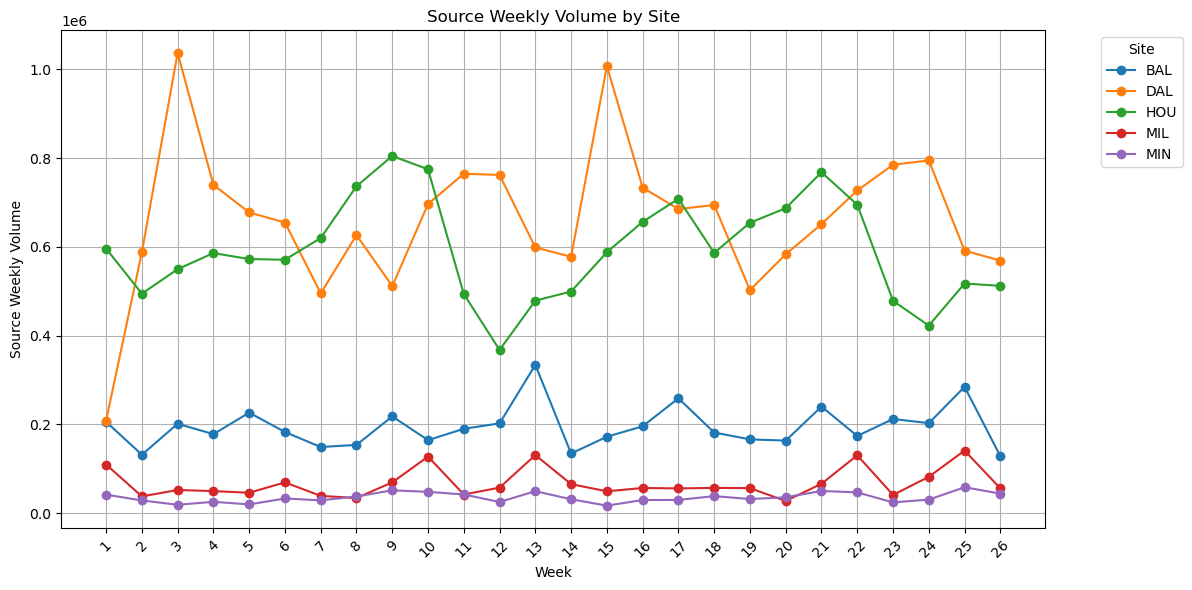

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define global parameters
predict = 26  # Number of weeks to predict
weekCodes = [str(i) for i in range(1, predict + 1)]

# Load the data from the compiled CSV file
input_file = r'C:\Users\aaron.eades\OneDrive - Liquid Environmental Solutions\Documents\Programing\Python\Automated Density\exports\compiled_file_with_source_2.csv'
df = pd.read_csv(input_file)

# Function to create the source projection based on Source_NSD, frequency, and gallons
def create_customer_projection(start_week, frequency, gallons):
    projection = pd.Series(0, index=weekCodes)
    for week in range(start_week, predict + 1, frequency):
        if week <= predict:
            projection[str(week)] = gallons
    return projection

# List to store source projections for each customer
source_projections = []

# Generate projections for each customer using 'Source_NSD' as start_week
for idx, row in df.iterrows():
    try:
        start_week = int(row['Source_NSD'])  # Source start week is in 'Source_NSD'
        frequency = int(row['FREQ'])  # Frequency of service
        gallons = float(row['GALLONS'])  # Gallons for each customer

        # Create the projection for the source
        source_projection = create_customer_projection(start_week, frequency, gallons)

        # Append to source projections with the Site as an identifier
        source_projections.append((row['Site'], source_projection))
    
    except ValueError:
        print(f"Skipping row {idx} due to missing or invalid data.")

# Convert the list of projections into a DataFrame
projection_df = pd.DataFrame([proj[1] for proj in source_projections])
projection_df['Site'] = [proj[0] for proj in source_projections]

# Group by 'Site' and sum the Source Volume (week columns)
grouped_source = projection_df.groupby('Site')[weekCodes].sum()

# Plot the source volumes for each site
fig, ax = plt.subplots(figsize=(12, 6))

for site in grouped_source.index:
    ax.plot(weekCodes, grouped_source.loc[site], label=site, marker='o')

# Customize the plot
ax.set_xlabel('Week')
ax.set_ylabel('Source Weekly Volume')
ax.set_title('Source Weekly Volume by Site')
ax.legend(title='Site', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\aaron.eades\AppData\Local\Temp\ipykernel_3700\2097605054.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_cycle = itertools.cycle(plt.cm.get_cmap('tab10').colors)


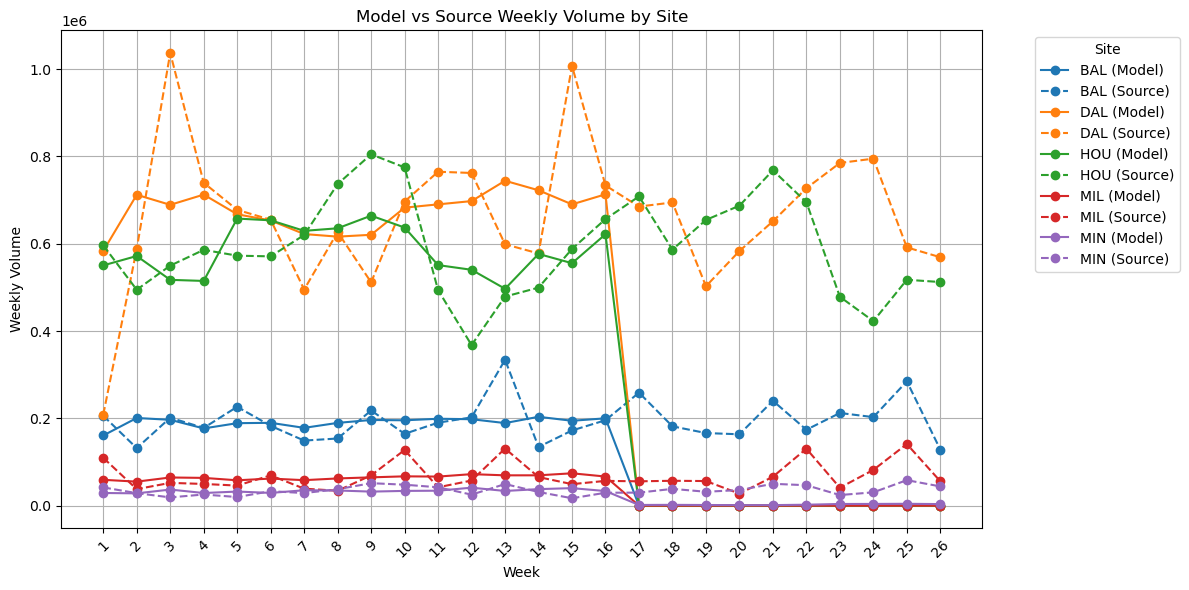

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Load the data from the compiled CSV file
input_file = r'C:\Users\aaron.eades\OneDrive - Liquid Environmental Solutions\Documents\Programing\Python\Automated Density\exports\compiled_file_with_source_2.csv'
df = pd.read_csv(input_file)

# List of columns representing the weeks (1 to 26)
week_columns = [str(i) for i in range(1, 27)]  # Adjust the range if fewer or more weeks exist

# Group by 'Site' and sum the Model Volume (week columns)
grouped_model = df.groupby('Site')[week_columns].sum()

# Define global parameters for Source projection
predict = 26  # Number of weeks to predict
weekCodes = [str(i) for i in range(1, predict + 1)]

# Function to create the source projection based on Source_NSD, frequency, and gallons
def create_customer_projection(start_week, frequency, gallons):
    projection = pd.Series(0, index=weekCodes)
    for week in range(start_week, predict + 1, frequency):
        if week <= predict:
            projection[str(week)] = gallons
    return projection

# List to store source projections for each customer
source_projections = []

# Generate projections for each customer using 'Source_NSD' as start_week
for idx, row in df.iterrows():
    try:
        start_week = int(row['Source_NSD'])  # Source start week is in 'Source_NSD'
        frequency = int(row['FREQ'])  # Frequency of service
        gallons = float(row['GALLONS'])  # Gallons for each customer

        # Create the projection for the source
        source_projection = create_customer_projection(start_week, frequency, gallons)

        # Append to source projections with the Site as an identifier
        source_projections.append((row['Site'], source_projection))
    
    except ValueError:
        print(f"Skipping row {idx} due to missing or invalid data.")

# Convert the list of projections into a DataFrame
projection_df = pd.DataFrame([proj[1] for proj in source_projections])
projection_df['Site'] = [proj[0] for proj in source_projections]

# Group by 'Site' and sum the Source Volume (week columns)
grouped_source = projection_df.groupby('Site')[weekCodes].sum()

# Set up a color cycle so that each site gets a unique color but matching for model and source
color_cycle = itertools.cycle(plt.cm.get_cmap('tab10').colors)

# Plot the source and model volumes for each site
fig, ax = plt.subplots(figsize=(12, 6))

for site, color in zip(grouped_model.index, color_cycle):
    # Plot the Model Weekly Volume
    ax.plot(weekCodes, grouped_model.loc[site], label=f'{site} (Model)', marker='o', linestyle='-', color=color)

    # Plot the Source Weekly Volume with the same color but different linestyle
    ax.plot(weekCodes, grouped_source.loc[site], label=f'{site} (Source)', marker='o', linestyle='--', color=color)

# Customize the plot
ax.set_xlabel('Week')
ax.set_ylabel('Weekly Volume')
ax.set_title('Model vs Source Weekly Volume by Site')
ax.legend(title='Site', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [66]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the compiled CSV file
input_file = r'C:\Users\aaron.eades\OneDrive - Liquid Environmental Solutions\Documents\Programing\Python\Automated Density\exports\compiled_file_with_source_2.csv'
df = pd.read_csv(input_file)

# List of columns representing the weeks (1 to 26)
week_columns = [str(i) for i in range(1, 27)]  # Adjust the range if fewer or more weeks exist

# Group by 'Site' and sum the Model Volume (week columns)
grouped_model = df.groupby('Site')[week_columns].sum()

# Define global parameters for Source projection
predict = 26  # Number of weeks to predict
weekCodes = [str(i) for i in range(1, predict + 1)]

# Function to create the source projection based on Source_NSD, frequency, and gallons
def create_customer_projection(start_week, frequency, gallons):
    projection = pd.Series(0, index=weekCodes)
    for week in range(start_week, predict + 1, frequency):
        if week <= predict:
            projection[str(week)] = gallons
    return projection

# List to store source projections for each customer
source_projections = []

# Generate projections for each customer using 'Source_NSD' as start_week
for idx, row in df.iterrows():
    try:
        start_week = int(row['Source_NSD'])  # Source start week is in 'Source_NSD'
        frequency = int(row['FREQ'])  # Frequency of service
        gallons = float(row['GALLONS'])  # Gallons for each customer

        # Create the projection for the source
        source_projection = create_customer_projection(start_week, frequency, gallons)

        # Append to source projections with the Site as an identifier
        source_projections.append((row['Site'], source_projection))
    
    except ValueError:
        print(f"Skipping row {idx} due to missing or invalid data.")

# Convert the list of projections into a DataFrame
projection_df = pd.DataFrame([proj[1] for proj in source_projections])
projection_df['Site'] = [proj[0] for proj in source_projections]

# Group by 'Site' and sum the Source Volume (week columns)
grouped_source = projection_df.groupby('Site')[weekCodes].sum()

# Create the figure
fig = go.Figure()

# Add traces for each site's Model and Source projection
for site in grouped_model.index:
    # Source volume trace (now solid lines and primary colors)
    fig.add_trace(go.Scatter(x=weekCodes, y=grouped_source.loc[site],
                             mode='lines+markers', name=f'{site} (Source)',
                             line=dict(dash='solid'), visible=True))

    # Model volume trace (now dashed lines and secondary colors)
    fig.add_trace(go.Scatter(x=weekCodes, y=grouped_model.loc[site],
                             mode='lines+markers', name=f'{site} (Model)',
                             line=dict(dash='dash'), visible=True))

# Update layout for better interactivity
# Button logic now shows both the Source and Model lines together for the selected site
buttons = [
    {
        'method': 'restyle',
        'label': site,
        'args': [{'visible': [(i == j * 2 or i == j * 2 + 1) for i in range(len(grouped_model.index) * 2)]}]
    } for j, site in enumerate(grouped_model.index)
]

# Add "Select All" and "Clear All" options
buttons.append({
    'method': 'restyle',
    'label': 'Select All',
    'args': [{'visible': [True] * len(grouped_model.index) * 2}]
})

buttons.append({
    'method': 'restyle',
    'label': 'Clear All',
    'args': [{'visible': [False] * len(grouped_model.index) * 2}]
})

fig.update_layout(
    title="Model vs Source Weekly Volume by Site",
    xaxis_title="Week",
    yaxis_title="Weekly Volume",
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 1.15,
        'y': 1.15,
    }],
    legend_title="Site",
    xaxis=dict(tickmode='linear', tick0=1, dtick=1, range=[0, 15]),
    hovermode='x',
    height=800
)

# Display the plot
fig.show()
